# Oblig 2 - INFO284

### Imports of libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

### Import dataset file

In [4]:
df = pd.read_csv('../../../datasets/second_assignment/seeds_dataset_backup.txt', sep="\s+", names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coeff", "kernel_groove_length", "wheat_type"])

In [5]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,wheat_type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### Visualize unprocessed data

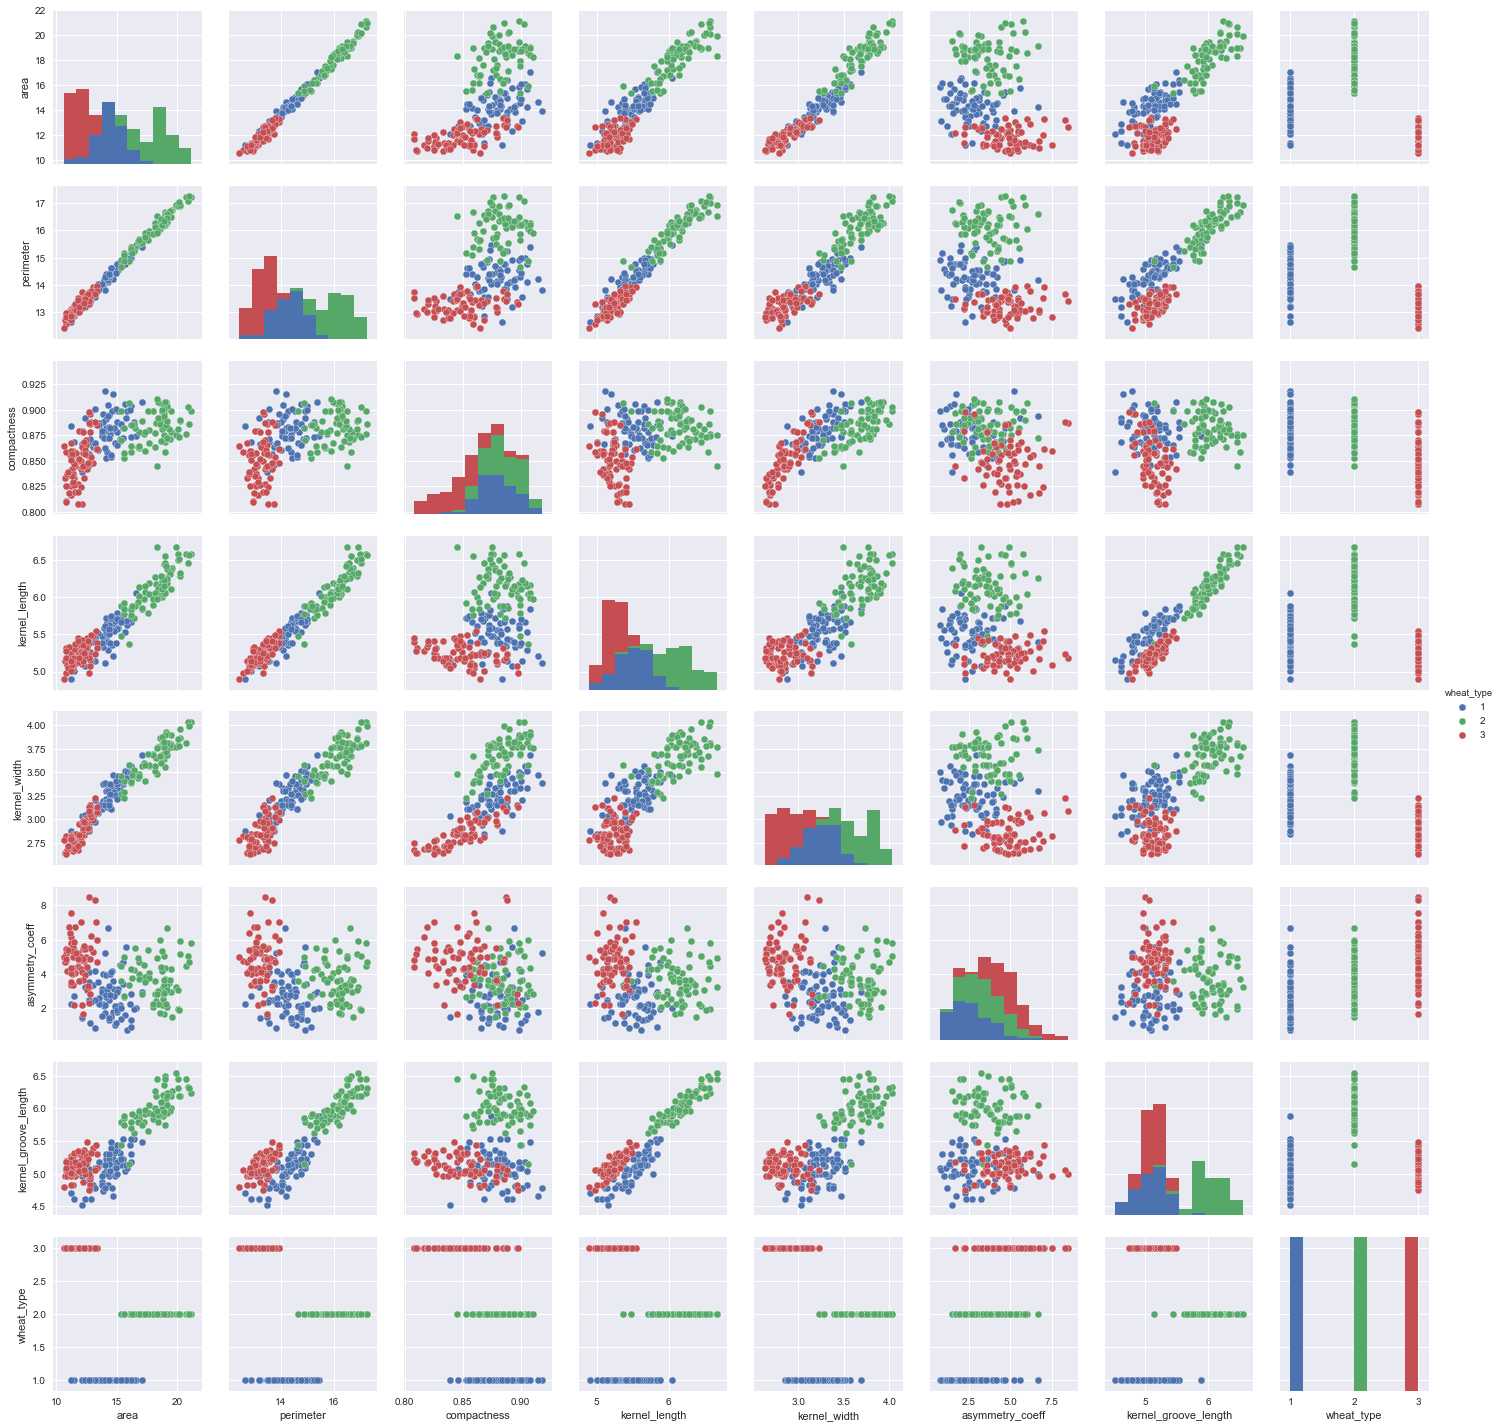

In [7]:
sns.pairplot(df, hue="wheat_type")

### Clean and process data
In a setting where we do not know exactly which types of measurements that have been used for each feature,  
it is good precaution to scale these measurements so that one feature does not take precedence over another

In [8]:
## Drop pre-made classification
cleaned_set = df.drop(["wheat_type"], axis=1)

In [9]:
## Scale the feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_set[cleaned_set.columns] = scaler.fit_transform(cleaned_set[cleaned_set.columns])

In [10]:
cleaned_set.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.570767,0.410773,0.448043,0.381633,0.437751
std,0.274759,0.269826,0.214423,0.249473,0.269219,0.195498,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.442831,0.204533,0.223806,0.233575,0.258986
50%,0.355524,0.394628,0.593013,0.351633,0.432644,0.368474,0.346627
75%,0.634089,0.682851,0.723004,0.608530,0.664113,0.520570,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Determine how many clusters to use
If we were to ignore the fact that we know how many types the data has already been classified into, it would be wise to choose  
how many clusters we use based on some criterion. AIC and/or BIC can be used for this, to evaluate if we're overfitting a given model.  
The "GaussianMixtureModel" from the SciKit-Learn library has these built in.  

Extra information:  
https://en.wikipedia.org/wiki/Akaike_information_criterion  
https://en.wikipedia.org/wiki/Bayesian_information_criterion

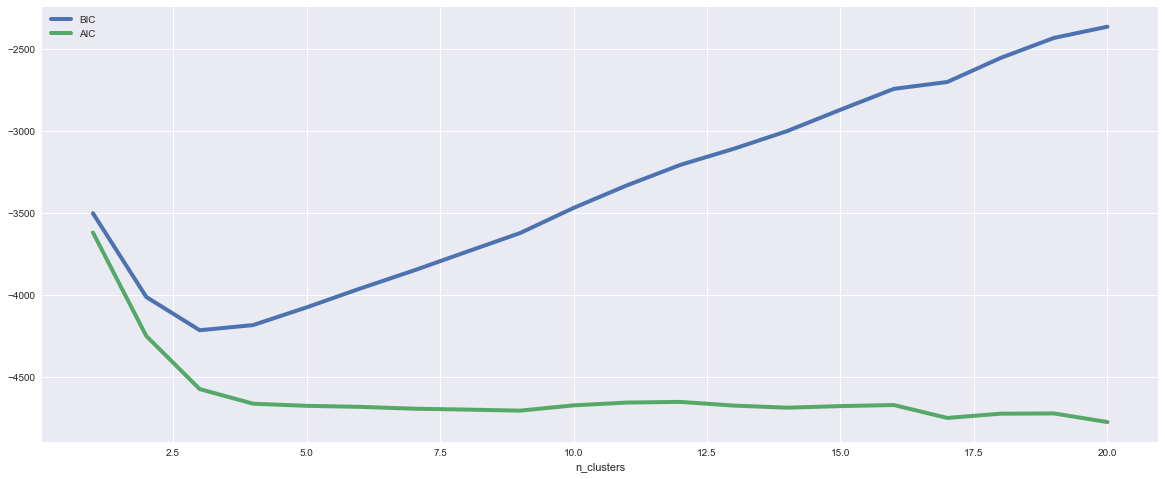

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,8))

n_clusters = np.arange(1, 21)
models = [GaussianMixture(n, random_state=0).fit(cleaned_set) for n in n_clusters]
ax1.plot(n_clusters, [m.bic(cleaned_set) for m in models], label='BIC', lw=4)
ax1.plot(n_clusters, [m.aic(cleaned_set) for m in models], label='AIC', lw=4)
ax1.set_xlabel('n_clusters')
ax1.legend()

#### Starting point
We see from the figure above that the results from AIC and BIC hit a low point around 3-4,  
thus this would be a reasonable starting point for how many clusters/catergories we are looking for.

### Fit data with K-Means clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
k_cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

In [14]:
#Fit with all features
k_cluster.fit(cleaned_set)
allfeatures_labels = k_cluster.labels_

In [15]:
#Fit with a selection features
k_cluster.fit(cleaned_set.drop(['area', 'perimeter'], axis=1))
selectedfeatures_labels = k_cluster.labels_

Text(0.5,0,'compactness')

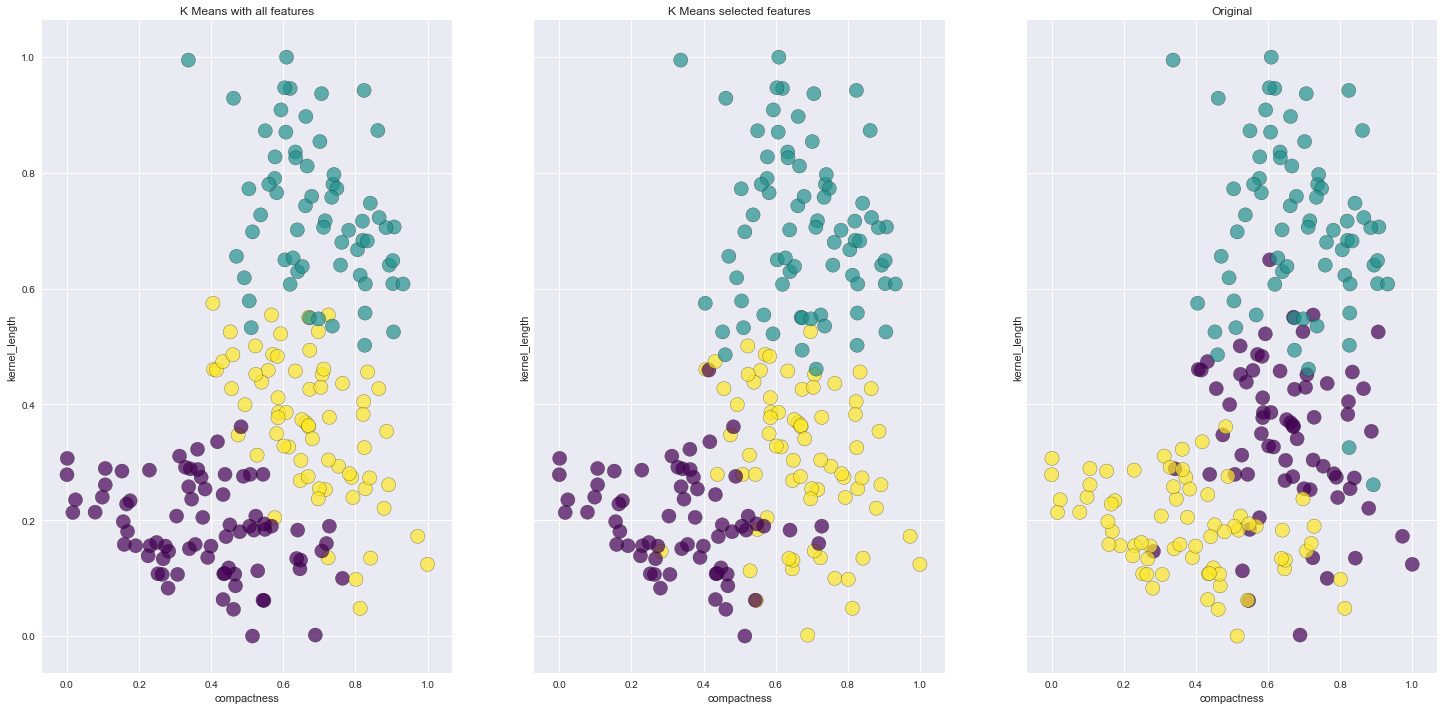

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,12), squeeze=True)

x_feature = 'compactness'
y_feature = 'kernel_length'

ax1.set_title("K Means with all features")
ax1.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=allfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax1.set_ylabel(y_feature)
ax1.set_xlabel(x_feature)

ax2.set_title("K Means selected features")
ax2.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=selectedfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax2.set_ylabel(y_feature)
ax2.set_xlabel(x_feature)

ax3.set_title("Original")
ax3.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=df["wheat_type"], cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax3.set_ylabel(y_feature)
ax3.set_xlabel(x_feature)

### Purity
//comment on purity

## Fit data with Gaussian mixture models clustering

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
#Fit with all features
g_cluster = GaussianMixture(n_components=3, random_state=0).fit(cleaned_set)
allfeatures_labels = g_cluster.predict(cleaned_set)

In [19]:
#Fit with a selection of features
cleaned_set_reduced = cleaned_set.drop(['area', 'perimeter'], axis=1)
g_cluster = GaussianMixture(n_components=3, random_state=0).fit(cleaned_set_reduced)
selectedfeatures_labels = g_cluster.predict(cleaned_set_reduced)

Text(0.5,0,'compactness')

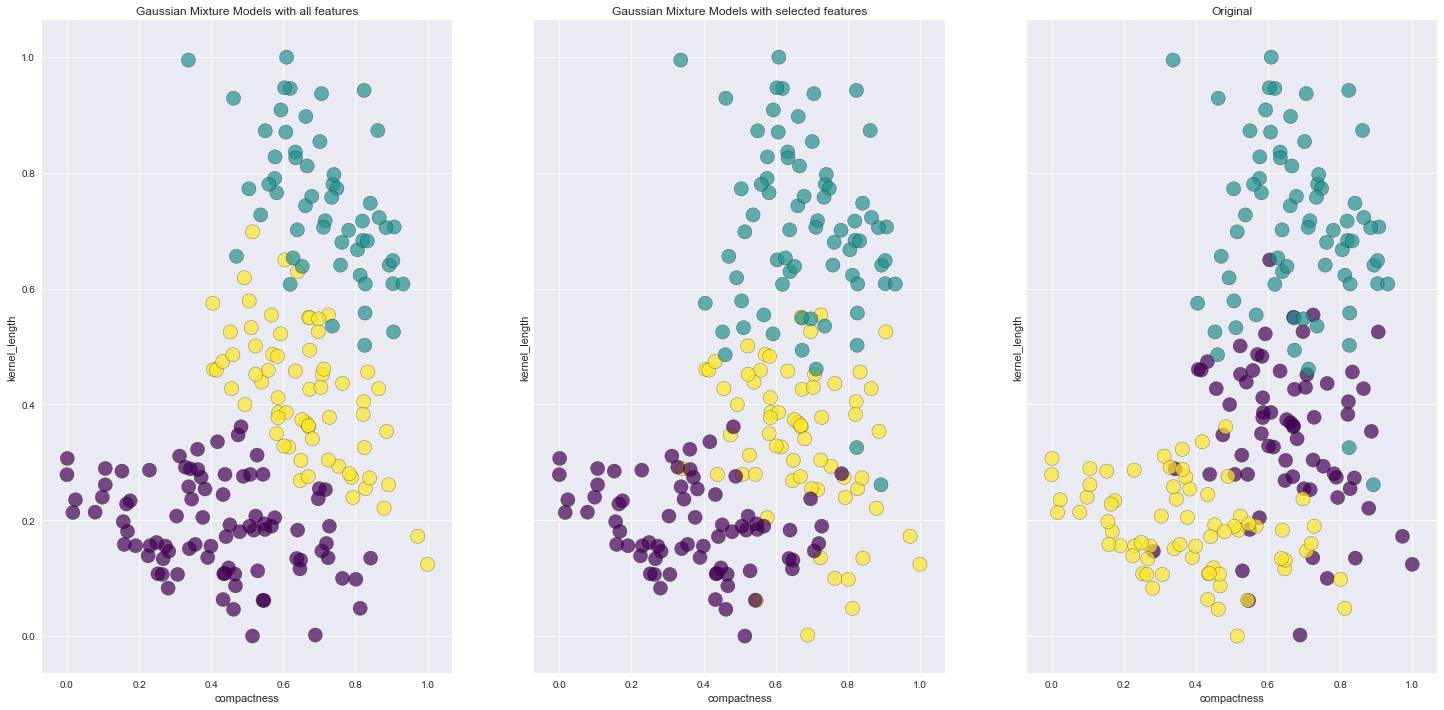

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,12), squeeze=True)

x_feature = 'compactness'
y_feature = 'kernel_length'

ax1.set_title("Gaussian Mixture Models with all features")
ax1.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=allfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax1.set_ylabel(y_feature)
ax1.set_xlabel(x_feature)

ax2.set_title("Gaussian Mixture Models with selected features")
ax2.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=selectedfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax2.set_ylabel(y_feature)
ax2.set_xlabel(x_feature)

ax3.set_title("Original")
ax3.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=df["wheat_type"], cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax3.set_ylabel(y_feature)
ax3.set_xlabel(x_feature)

### Purity
//comment on purity